<a href="https://colab.research.google.com/github/sherjahong1r/Machine-Learning-Lessons/blob/main/01_k_NN_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification**

# **k-NN. scikit-learn**

# Ko'krak saratonini aniqlash

##**Ushbu ma'lumotlar to'plami Kaggle'dan olingan**

In [1]:
import pandas as pd
import numpy as np

### df jadvali ko'krak saratoni ma'lumotlarini o'z ichiga oladi. diagnosis ustunida 'M' yomon sifatli o'simtani, 'B' esa yaxshi sifatli o'simtani bildirad

In [2]:
url = 'https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/breast-cancer.csv'
df = pd.read_csv(url)
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
460,911296201,M,17.08,27.15,111.20,930.9,0.09898,0.11100,0.10070,0.064310,...,22.96,34.49,152.10,1648.0,0.1600,0.24440,0.263900,0.155500,0.3010,0.09060
544,922297,B,13.87,20.70,89.77,584.8,0.09578,0.10180,0.03688,0.023690,...,15.05,24.75,99.17,688.6,0.1264,0.20370,0.137700,0.068450,0.2249,0.08492
433,908445,M,18.82,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.087440,...,22.66,30.93,145.30,1603.0,0.1390,0.34630,0.391200,0.170800,0.3007,0.08314
285,8912521,B,12.58,18.40,79.83,489.0,0.08393,0.04216,0.00186,0.002924,...,13.50,23.08,85.56,564.1,0.1038,0.06624,0.005579,0.008772,0.2505,0.06431
408,90524101,M,17.99,20.66,117.80,991.7,0.10360,0.13040,0.12010,0.088240,...,21.08,25.41,138.10,1349.0,0.1482,0.37350,0.330100,0.197400,0.3060,0.08503
401,904647,B,11.93,10.91,76.14,442.7,0.08872,0.05242,0.02606,0.017960,...,13.80,20.14,87.64,589.5,0.1374,0.15750,0.151400,0.068760,0.2460,0.07262
73,859983,M,13.80,15.79,90.43,584.1,0.10070,0.12800,0.07789,0.050690,...,16.57,20.86,110.30,812.4,0.1411,0.35420,0.277900,0.138300,0.2589,0.10300
480,912193,B,12.16,18.03,78.29,455.3,0.09087,0.07838,0.02916,0.015270,...,13.34,27.87,88.83,547.4,0.1208,0.22790,0.162000,0.056900,0.2406,0.07729
476,911654,B,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.030580,...,16.45,27.26,112.10,828.5,0.1153,0.34290,0.251200,0.133900,0.2534,0.07858
148,86973702,B,14.44,15.18,93.97,640.1,0.09970,0.10210,0.08487,0.055320,...,15.85,19.85,108.60,766.9,0.1316,0.27350,0.310300,0.159900,0.2691,0.07683


In [3]:
df.shape

(569, 32)

###**Ustun ma'nolari**

id: Identifikator raqami

diagnosis: Tashxis (rak turi)

radius_mean: O'simtaning o'rtacha radiusi

texture_mean: O'simtaning o'rtacha teksturasi (sirtining xususiyati)

perimeter_mean: O'simtaning o'rtacha perimetri (aylanasi)

area_mean: O'simtaning o'rtacha yuzasi

smoothness_mean: O'simtaning o'rtacha silliqligi

compactness_mean: O'simtaning o'rtacha ixchamligi

concavity_mean: O'simtaning o'rtacha botiqligi

concave points_mean: O'simtaning o'rtacha botiq nuqtalari soni

symmetry_mean: O'simtaning o'rtacha simmetriyasi

fractal_dimension_mean: O'simtaning o'rtacha fraktal o'lchami

Va xuddi shunday, _se bilan tugaydigan ustunlar o'lchovlarning standart xatoligini, _worst bilan tugaydigan ustunlar esa o'simtaning eng yomon (eng katta yoki eng xavfli) xususiyatlarini bildiradi.



## **Maqsad diagnosis ustunini baholash yani berilgan qiymatlar asosida diagnosisini bashorat qilamiz**

In [4]:
df['diagnosis'].value_counts()
# M - o'simta degani
# B - o'simta bor lekin rak emas

,count
diagnosis,
B,357
M,212


## Bu qiymatlarni 0 va 1 ga o'zgartirib olamiz. M = 1, B = 0

### 0 va 1 o'girishninig 2 xil usuli bor

**1-usul:** sklearn tarkibidagi labelencoder

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['diagnosis'] = le.fit_transform(df['diagnosis'].values)
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


**2-usul:** pandasdagi replace() metodidan foydalanish

In [6]:
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


## ID ustunini tashlab yuboramiz

In [7]:
df.drop('id', axis=1, inplace=True)
df.head()

# chunki bu ID ustuni kasalikni aniqlashda ahamiyat kasb etmaydi

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

# df ma'lumotlar jadvalining ustunlari orasidagi bog'liqlik (korrelyatsiya) matritsasini hisoblaydi.
# abs() metodi korrelyatsiyaning mutlaq qiymatini oladi (ya'ni, manfiy bog'liqlik ham ijobiy qilib ko'rsatiladi),
# so'ngra background_gradient(cmap='coolwarm') yordamida bu matritsani rangli gradyent bilan vizuallashtiradi,
# bu esa bog'liqlik darajasini vizual ravishda osonroq tushunishga yordam beradi. Masalan, to'q qizil rang kuchli ijobiy
# yoki manfiy bog'liqlikni, ko'k rang esa kuchsiz bog'liqlikni bildiradi.

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,0.012838,0.567134,0.008303,0.556141,0.548236,0.067016,0.292999,0.253730,0.408042,0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [9]:
df.corrwith(df['diagnosis']).abs().sort_values(ascending=False)
# Bu corrwith bilan bitta ustuni qolganlariga nisbatan correlyasiyasini aniqlashimiz mumkin

,0
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


In [10]:
corr_matrix1 = df.corrwith(df['diagnosis']).abs().sort_values(ascending=False)
corr_matrix1.to_frame().style.background_gradient(cmap='coolwarm')
# Bunda rangi bilan chiqarayabmiz yuqoridagi bitta ustunni
# sort_values ishlatganimiz uchun correlyasiyasi eng yuqoridan pastga qarab kamayish tartibida joylashtiradi

,0
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


## ML ga tayyorlaymiz

In [11]:
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis']

In [12]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# X va y: Bular sizning ma'lumotlaringiz. X kirish (input) xususiyatlari, y esa chiqarish (output) ma'lumotlari (bu holatda diagnosis).
# test_size=0.2: Ma'lumotlarning 20% sinov to'plami (X_test, y_test) uchun, qolgan 80% esa o'quv to'plami (X_train, y_train) uchun ajratilishini bildiradi.
# random_state=12: Bu qiymat ma'lumotlarni har safar bir xil tartibda ajratishni ta'minlaydi. Ya'ni, agar siz kodni bir necha marta
# ishga tushirsangiz ham, har safar bir xil bo'linishni olasiz. Bu natijalarni qayta tiklash (reproducibility) uchun muhimdir.


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [14]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# scaler.transform(X_train): X_train (o'quv to'plami) dagi barcha ustunlarni standartlashtiradi.
# Bunda har bir ustun o'zining o'rtacha qiymati (mean) va standart og'ishiga
# (standard deviation) qarab o'zgartiriladi. Bu ma'lumotlarni bir xil shkalaga olib keladi.
# scaler.transform(X_test): X_test (sinov to'plami) dagi ustunlarni ham xuddi shu tarzda standartlashtiradi.
# Muhimi shundaki, X_train ga qo'llanilgan o'rtacha qiymat va standart og'ishlari X_test ga ham qo'llaniladi.
# Bu test ma'lumotlariga train ma'lumotlaridan bilim "sizib chiqishining" oldini oladi (data leakage).

#ML

In [15]:
# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) # k-ni qiymati

knn.fit(X_train_scaled, y_train)

# from sklearn.neighbors import KNeighborsClassifier: Bu qator KNeighborsClassifier sinfini
# scikit-learn kutubxonasidan import qiladi, bu bizga k-NN modelini yaratish imkonini beradi.
# knn = KNeighborsClassifier(n_neighbors=5): Bu qatorda KNeighborsClassifier obyekti yaratiladi
# va knn nomli o'zgaruvchiga yuklanadi. Bu yerda n_neighbors=5 parametri k ning qiymati bo'lib, har bir
# yangi ma'lumot nuqtasini tasniflashda nechta eng yaqin qo'shni nuqta hisobga olinishini bildiradi.
# Bu modelning qanchalik mahalliy yoki global qarorlar qabul qilishini belgilaydi.
# knn.fit(X_train_scaled, y_train): Bu qator k-NN modelini o'qitadi. Model X_train_scaled
# (standartlashtirilgan o'quv ma'lumotlari) va ularga mos keluvchi y_train (o'quv belgilari) yordamida o'qitiladi.
# k-NN uchun fit metodi asosan o'quv ma'lumotlarini eslab qolishdan iborat bo'ladi, chunki u bashorat qilishda eng yaqin qo'shnilarni izlaydi.

KNeighborsClassifier()

In [16]:
y_predict = knn.predict(X_test_scaled)
# Ushbu qator tayyorlangan k-NN modeli yordamida sinov ma'lumotlaridagi (test data) y qiymatlarini bashorat qilish uchun ishlatiladi:
# knn.predict(X_test_scaled): Bu yerda avvalgi bosqichda o'qitilgan knn modeli (KNeighborsClassifier)
# ishlatiladi. predict() metodi X_test_scaled (standartlashtirilgan sinov xususiyatlari)
# ma'lumotlarini qabul qiladi va har bir ma'lumot nuqtasi uchun mos keladigan diagnosis (0 yoki 1) ni bashorat qiladi.

#Baholash

# Jaccard index

In [17]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

# from sklearn.metrics import jaccard_score: Bu qator jaccard_score funksiyasini scikit-learn kutubxonasidan import qiladi.
# jaccard_score(y_test, y_predict): Bu funksiya modelning aniqligini (similarity) o'lchaydi. U ikkita parametrni qabul qiladi:
# y_test: Haqiqiy yorliqlar (true labels) — bu sinov to'plamidagi (X_test) ma'lumotlarning real natijalari.
# y_predict: Bashorat qilingan yorliqlar (predicted labels) — bu knn modeli tomonidan X_test_scaled ga nisbatan qilingan bashoratlar.

np.float64(0.8958333333333334)

# Confusion matrix

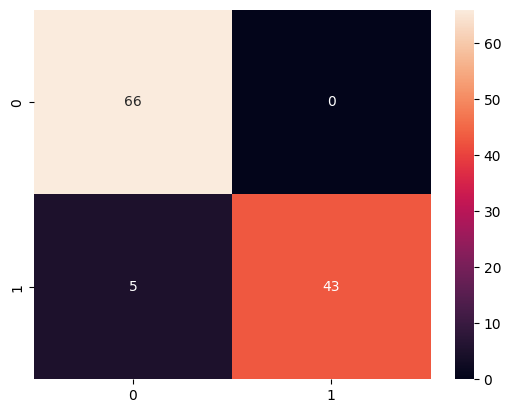

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

# Bu ham ham baholash bo'lib bunda confusion_matrix yordamida baholanmoqda
# Va matplotlib ni import qilib heatmap orqali ifodalanmoqda. y_test asl jadvaldagi diagnosis, y_predict bu
# biz kNN orqali diagnosis yani 0 yoki 1 qilib bashorat qilgan qiymatlarimiz

### M = 1, B = 0

### M - o'simta bor degani, B - o'simta xafi yo'q degani va ularni yuqorida 0 va 1 o'girgan edik.

### Bu yerda natijamizni ko'rishimiz mumkin 0 yani o'simta xafi yo'qlarni hammasini to'g'ri baholabmiz, ammo o'simta bor yani 1 larni 48 ta odamdan 5 tasini xato va qolgan 43 tasini to'g'ri bashorat qilibmiz.

### Yuqorida bu ko'rsatgich heatmap grafigi orqali pastda esa grafiksiz chiqarildi confusion_matrix yordamida

In [19]:
confusion_matrix(y_test, y_predict)
# Bu yuqoridagining grafiksiz ko'rinishi

array([[66,  0],
       [ 5, 43]])

# Precision, recall, F1

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

# precision_score: Precision (aniqlik) model tomonidan ijobiy deb bashorat qilingan holatlarning
# qanchalik to'g'ri ekanligini ko'rsatadi. Yuqori precision, modelning yolg'on ijobiy natijalarni kam berishini bildiradi.
# recall_score: Recall (to'liqlik) haqiqiy ijobiy holatlarning qanchasini model to'g'ri aniqlaganini ko'rsatadi.
# Yuqori recall, modelning haqiqiy ijobiy holatlarni o'tkazib yubormasligini bildiradi (yolg'on manfiy natijalar kam).
# f1_score: F1-score precision va recallning garmonik o'rtachasi bo'lib, ikkala metrikani ham
# muvozanatli tarzda hisobga oladi. Bu metrika, ayniqsa, sinflar soni nomutanosil bo'lgan holatlarda foydali.
# accuracy_score: Accuracy (aniqlik) barcha to'g'ri bashorat qilingan holatlarning (ijobiy va manfiy) umumiy holatlar
# soniga nisbatini ko'rsatadi. Bu eng sodda va tushunarli metrika, ammo nomutanosil ma'lumotlar to'plamida yolg'on tasvir berishi mumkin.
# print(f"...") esa hisoblangan bu metrikalarning qiymatlarini ekranga chiqaradi.

precision=1.0
recall=0.8958333333333334
f1=0.945054945054945
accuracy=0.956140350877193


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

# Bu ham yuqoridagilar bilan bir xil yani hammasini bitada jamlab chiqaradi.
# classification_report — bu modelning har bir sinf bo'yicha precision, recall, f1-score
# va accuracy kabi baholash metrikalarini jamlab beradigan hisobot.

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        66
           1       1.00      0.90      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# Cross-validation yordamida tekshirish

### Enga yaxshi va to'g'ri baholash bu Cross-validation bilan bo'ldi

In [22]:
# Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X, y = y, cv=10)
# cross_val_predict(estimator = knn, X = X, y = y, cv=10): Bu funksiya knn modelini butun X va y
# ma'lumotlar to'plamida o'qitish va bashorat qilish uchun cv=10 (10 qavatli kross-validatsiya) ni qo'llaydi.
# Natijada, har bir ma'lumot nuqtasi uchun modelning bashorati (predict) qaytariladi.

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification report:\n", classification_report(y, predict))

# Bu usul modelning ma'lumotlarning barcha qismlarida qanchalik yaxshi ishlashini baholashga yordam beradi
# va modelning yangi (ko'rilmagan) ma'lumotlarda qanday ishlashi haqida yanada ishonchli tasavvur beradi.

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       357
           1       0.92      0.89      0.90       212

    accuracy                           0.93       569
   macro avg       0.93      0.92      0.92       569
weighted avg       0.93      0.93      0.93       569



# **NEW SECTION**

# **Eng yaxshi k ni topish**

# for yordamida

### Biz yuqorida k ga taxmin sifatida 5 bergan edik pastdagi codlarda esa eng maqul variantni berishni ko'rib chiqamiz dastlab for yordamida amalga oshirildi

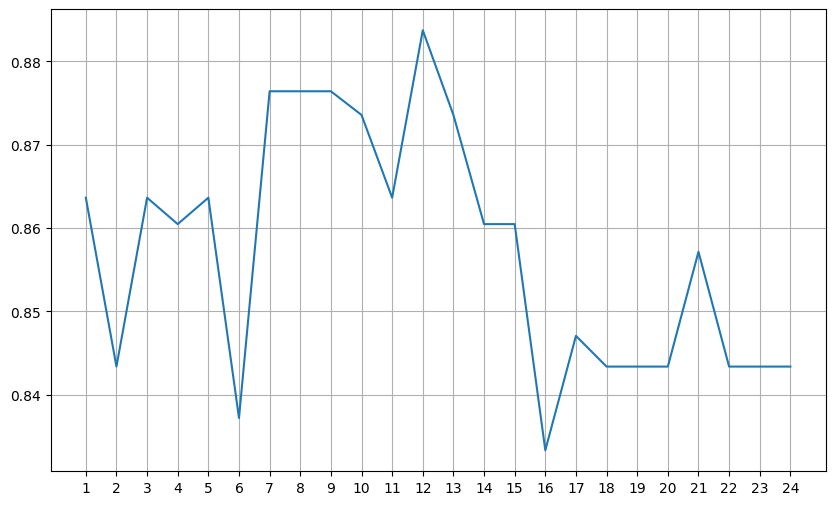

In [24]:
f1 = []
for k in range(1, 25):
  knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
  knn.fit(X_train, y_train)
  y_predict = knn.predict(X_test)
  f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 25), f1)
plt.xticks(range(1, 25))
plt.grid()
plt.show()

# Ushbu kod k-NN modelining eng yaxshi k qiymatini topish uchun bir qator qadamlarni amalga oshiradi va natijalarni grafikda ko'rsatadi:
# for k in range(1, 25):: 1 dan 24 gacha bo'lgan har bir k qiymati uchun tsiklni ishga tushiradi.
# Modelni o'qitish va bashorat qilish: Har bir k uchun yangi KNeighborsClassifier modeli yaratiladi,
# X_train va y_train yordamida o'qitiladi, so'ngra X_test yordamida y_predict bashorat qilinadi.
# f1.append(f1_score(y_test, y_predict)): Har bir k uchun hisoblangan F1-score f1 ro'yxatiga qo'shiladi.
# Grafik chizish: So'ngra plt.plot() yordamida k qiymatlari (range(1, 25)) va ularga mos keladigan f1 ballari
# o'rtasidagi bog'liqlik chizilgan grafikda ko'rsatiladi. Bu grafik eng yuqori F1-score beradigan k qiymatini vizual tarzda aniqlashga yordam beradi.
# Grafikning eng baland nuqtasi eng yaxshi yechim yani bu yerda 13 hisoblanadi

# Grid Search yordamida

### Yuqorida biz for dan foydalnib aniqlagan edik ammo tayyor GridSearch moduli bor sklearn da biz bundan ham foydalanib ko'ramiz

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X, y)
# GridSearchCV - bu k kabi model parametrlarini (hyperparameters) avtomatik ravishda sinab ko'rib,
# modelning eng yaxshi ishlaydigan qiymatini topish uchun ishlatiladigan vositadir.

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [26]:
knn_gscv.cv_results_['rank_test_score']
# bu GridSearchCV tomonidan sinovdan o'tkazilgan har bir k (yoki boshqa parametr)
# qiymatining ish faoliyati bo'yicha o'rnatilgan reytingi. Qiymat qanchalik kichik bo'lsa (masalan, 1),
# ushbu parametr kombinatsiyasi shunchalik yaxshi natija bergan hisoblanadi.

array([24, 23, 22, 19, 12, 20, 15, 13,  4, 13, 11,  4,  2,  1,  9,  7,  7,
        3,  9, 16,  6, 18, 17, 21], dtype=int32)

In [27]:
knn_gscv.best_params_
# bu GridSearchCV natijasi bo'lib, sinovdan o'tkazilgan parametrlar orasida modelga eng yaxshi
# natijani bergan parametrlar kombinatsiyasini (bu holatda eng yaxshi 'k' qiymatini) qaytaradi.

# shunda k beradiga eng yaxshi qiymat bu 14 ekan

{'n_neighbors': np.int64(14)}

In [28]:
knn_gscv.best_score_
# bu GridSearchCV tomonidan topilgan eng yaxshi parametrlar kombinatsiyasining (bu yerda n_neighbors)
# kross-validatsiya bo'yicha erishilgan eng yuqori baho (skor) qiymatini qaytaradi. Bu modelning eng yaxshi ishlash ko'rsatkichidir.

np.float64(0.935010091600683)

### Bunda k ga beradiga eng yaxshi qiymat yani 14 ni grafik yordamida tasvirlanishi

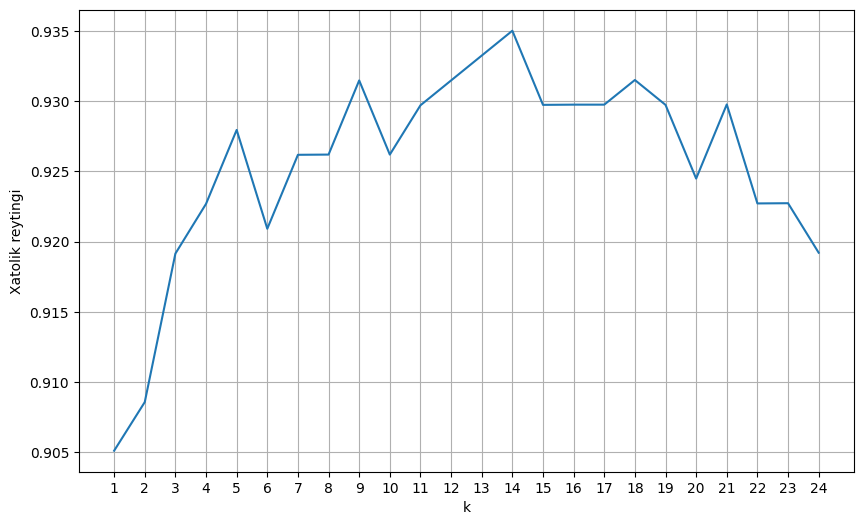

In [31]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['mean_test_score'])
# n_neighbors (ya'ni, k qiymatlari) bo'yicha mean_test_score (o'rtacha test skori) ni aks ettiruvchi chiziqli grafik chizadi.
plt.xticks(param_grid['n_neighbors'])
# Bu qator x o'qi bo'ylab belgilar (ticks) sifatida n_neighbors qiymatlarini ko'rsatishni ta'minlaydi, bu esa grafikni o'qishni osonlashtiradi.
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()